In [1]:
import numpy as np 
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from IPython.display import Image

In [2]:
# parameters of the stock and the option 
S0 = 1.00
r = 0.06
sigma = 0.15
T = 3
K = 1.10   

In [3]:
# numeric parameters - number of intervals, number of samples, random numbers 
N = 250
h = T/N 
M = 50000
S = S0*np.ones([M,N+1])
Z = npr.randn(M,N)
b = 3               # number of basis functions - up to 4
disc = np.exp(-r*h)      # one period discount factor 

In [4]:
# generate price paths using the GBM formula
for n in range(0,N): 
    tem =(r-0.5*sigma**2)*h + np.sqrt(h)*sigma*Z[:,n] 
    S[:,n+1]=S[:,n]*np.exp(tem)

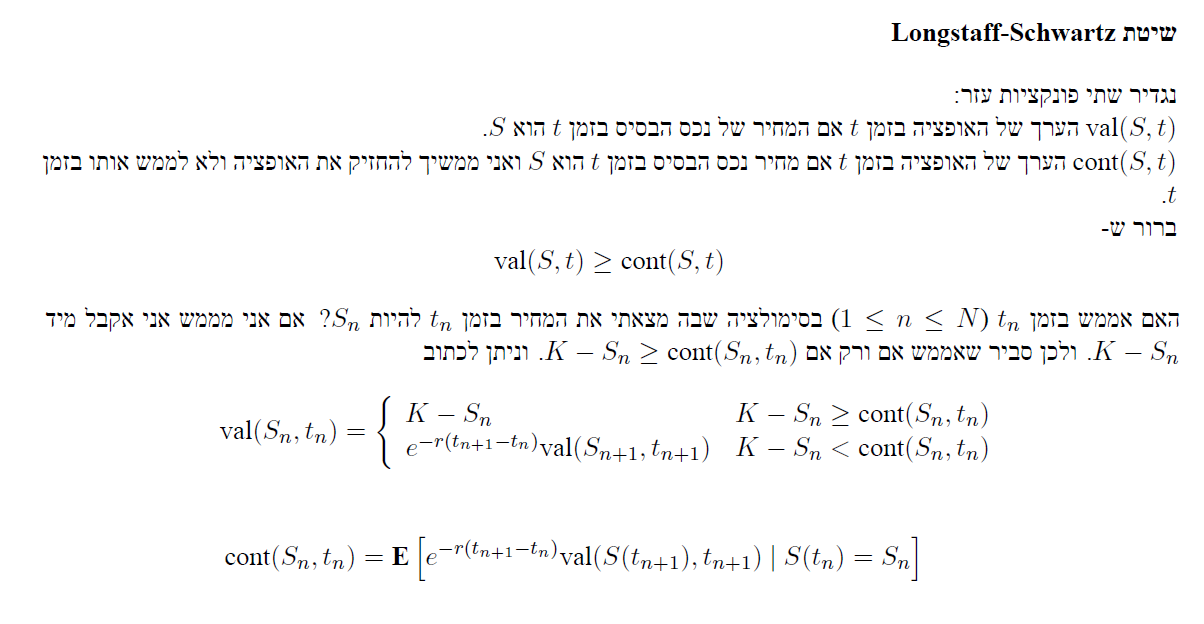

In [5]:
Image(filename='LongstaffSchwartz.png')

In [6]:
# exercise value
def exer(SS):
    return((K-SS)*(K>SS))

In [7]:
# Basis functions
def psi(i,SS):
    if i==0:
        return(1)
    elif i==1:
        return((1-SS/K))
    elif i==2:
        return((1-SS/K)**2)
    elif i==3:
        return((1-SS/K)**3)

In [8]:
c = np.zeros([b,N+1])     # coefficients of continuation values
MM = np.zeros([b,b])      # normalization matrix
val = np.zeros([M,N+1])   # option values in simulation 
val[:,N] = exer(S[:,N])   # option values at final time

In [9]:
for k in range(N-1,-1,-1):
    sel = S[:,k]<K
    val[~sel,k] =  disc*val[~sel,k+1]
    Ssel = S[sel,k]
    valsel = disc*val[sel,k+1]
    for i in range(0,b):
        c[i,k] = np.mean( valsel *  psi(i,Ssel))      # was called d in file 
        MM[i,i] = np.mean( psi(i,Ssel) *  psi(i,Ssel) )   
        for j in range(i+1,b):
            MM[i,j] = np.mean( psi(i,Ssel) *  psi(j,Ssel) ) 
            MM[j,i] = MM[i,j] 
    c[:,k] = np.linalg.solve(MM,c[:,k])
    cont = np.zeros(Ssel.size)
    for i in range(0,b):
        cont = cont + c[i,k] * psi(i,Ssel)
    val[sel,k] = exer(Ssel) * (exer(Ssel) > cont) + disc*val[sel,k+1] * (exer(Ssel) < cont)
    V = np.mean(val[:,0])
    SE = np.std(val[:,0])/np.sqrt(M)
print("price of the put option is: {:.4f}, with a stochastic error of {:.5f}".format(V,SE))

price of the put option is: 0.1083, with a stochastic error of 0.00030
